In [ ]:
Както винаги, първоначално добавяме библиотеките, които ще използваме в изследването.

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Следващата стъпка е да прочетем инфорамацията и да я подредим. 
В това число влиза и да я почистим, ако има празни клетки, но в нашия случай няма такива и затова продължаваме напред.


In [2]:
# names = ['Pass','Profit', 'Total_trades','Profit_factor','Expected_Payoff','Drawdown_$','Drawdown_%','Inputs']
df_2 = pd.read_csv('C:/Users/Marin/Desktop/doktorar/qoutes/nzdusd/testing/AUDUSD/H4/H4_audusd_optimizationSETTINGS.txt', delimiter = '\t', header=None,names = ['Pass','Profit', 'Total_trades','Profit_factor','Expected_Payoff','Drawdown_$','Drawdown_%','??','volume_1','volume_2','volume_3','pips2','pips3','pips1','hiddenAction'] )
df_2.head()

,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,??,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction
0,190000,19996.30,393,6.75,50.88,47406.80,40.22%,0.0,volume1=10,volume2=1,volume3=1,pips2=2,pips3=11,pips1=1,hiddenActions=0
1,189990,19823.53,393,6.82,50.44,47013.91,39.94%,0.0,volume1=10,volume2=0.9,volume3=1,pips2=2,pips3=11,pips1=1,hiddenActions=0
2,189980,19650.76,393,6.89,50.00,46621.02,39.66%,0.0,volume1=10,volume2=0.8,volume3=1,pips2=2,pips3=11,pips1=1,hiddenActions=0
3,189970,19477.99,393,6.96,49.56,46228.13,39.37%,0.0,volume1=10,volume2=0.7,volume3=1,pips2=2,pips3=11,pips1=1,hiddenActions=0
4,420337,19435.90,393,3.45,49.46,48677.40,40.22%,0.0,volume1=10,volume2=1,volume3=1,pips2=2,pips3=22,pips1=1,hiddenActions=0


In [3]:
import re

df_3 = df_2
#df_3[Drawdown_%] = re.sub("%", "", df_3[Drawdown_%])
#df_3.Drawdown_%.replace('%', '')

df_3['Drawdown_%'] = df_3['Drawdown_%'].str.replace('%', '')
df_3['volume_1'] = df_3['volume_1'].str.replace('volume1=', '')
df_3['volume_2'] = df_3['volume_2'].str.replace('volume2=', '')
df_3['volume_3'] = df_3['volume_3'].str.replace('volume3=', '')

df_3['pips2'] = df_3['pips2'].str.replace('pips2=', '')
df_3['pips3'] = df_3['pips3'].str.replace('pips3=', '')
df_3['pips1'] = df_3['pips1'].str.replace('pips1=', '')

df_3['hiddenAction'] = df_3['hiddenAction'].str.replace('hiddenActions=', '')

df_3.head()

,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,??,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction
0,190000,19996.30,393,6.75,50.88,47406.80,40.22,0.0,10,1,1,2,11,1,0
1,189990,19823.53,393,6.82,50.44,47013.91,39.94,0.0,10,0.9,1,2,11,1,0
2,189980,19650.76,393,6.89,50.00,46621.02,39.66,0.0,10,0.8,1,2,11,1,0
3,189970,19477.99,393,6.96,49.56,46228.13,39.37,0.0,10,0.7,1,2,11,1,0
4,420337,19435.90,393,3.45,49.46,48677.40,40.22,0.0,10,1,1,2,22,1,0


In [4]:
df_4 = df_3[['Pass','Profit','Total_trades','Profit_factor','Expected_Payoff','Drawdown_$','Drawdown_%','volume_1','volume_2','volume_3','pips2','pips3','pips1','hiddenAction']]
df_4.head()

,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction
0,190000,19996.30,393,6.75,50.88,47406.80,40.22,10,1,1,2,11,1,0
1,189990,19823.53,393,6.82,50.44,47013.91,39.94,10,0.9,1,2,11,1,0
2,189980,19650.76,393,6.89,50.00,46621.02,39.66,10,0.8,1,2,11,1,0
3,189970,19477.99,393,6.96,49.56,46228.13,39.37,10,0.7,1,2,11,1,0
4,420337,19435.90,393,3.45,49.46,48677.40,40.22,10,1,1,2,22,1,0


In [5]:
df_4['Drawdown_%'] = df_4['Drawdown_%'].astype(float)
df_4['volume_1'] = df_4['volume_1'].astype(float)
df_4['volume_2'] = df_4['volume_2'].astype(float)
df_4['volume_3'] = df_4['volume_3'].astype(float)

df_4['pips2'] = df_4['pips2'].astype(float)
df_4['pips3'] = df_4['pips3'].astype(float)
df_4['pips1'] = df_4['pips1'].astype(float)

df_4['hiddenAction'] = df_4['hiddenAction'].astype(float)

df_4.head()

C:\Users\Marin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Marin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Marin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction
0,190000,19996.30,393,6.75,50.88,47406.80,40.22,10.0,1.0,1.0,2.0,11.0,1.0,0.0
1,189990,19823.53,393,6.82,50.44,47013.91,39.94,10.0,0.9,1.0,2.0,11.0,1.0,0.0
2,189980,19650.76,393,6.89,50.00,46621.02,39.66,10.0,0.8,1.0,2.0,11.0,1.0,0.0
3,189970,19477.99,393,6.96,49.56,46228.13,39.37,10.0,0.7,1.0,2.0,11.0,1.0,0.0
4,420337,19435.90,393,3.45,49.46,48677.40,40.22,10.0,1.0,1.0,2.0,22.0,1.0,0.0


In [6]:
df_4["risk ratio"] = df_4['Profit']/df_4['Drawdown_$']
df_4.head()

,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction,risk ratio
0,190000,19996.30,393,6.75,50.88,47406.80,40.22,10.0,1.0,1.0,2.0,11.0,1.0,0.0,0.421802
1,189990,19823.53,393,6.82,50.44,47013.91,39.94,10.0,0.9,1.0,2.0,11.0,1.0,0.0,0.421652
2,189980,19650.76,393,6.89,50.00,46621.02,39.66,10.0,0.8,1.0,2.0,11.0,1.0,0.0,0.421500
3,189970,19477.99,393,6.96,49.56,46228.13,39.37,10.0,0.7,1.0,2.0,11.0,1.0,0.0,0.421345
4,420337,19435.90,393,3.45,49.46,48677.40,40.22,10.0,1.0,1.0,2.0,22.0,1.0,0.0,0.399280


In [7]:
#split dataset in features and target variable
feature_cols = ["volume_1", "volume_2", "volume_3", "pips2","pips3"]
X = df_4[feature_cols] # Features
y = df_4['risk ratio'] # Target variable

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [13]:
df_5_cut = df_4[:1000]
df_5_cut

,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction,risk ratio
0,190000,19996.30,393,6.75,50.88,47406.80,40.22,10.0,1.0,1.0,2.0,11.0,1.0,0.0,0.421802
1,189990,19823.53,393,6.82,50.44,47013.91,39.94,10.0,0.9,1.0,2.0,11.0,1.0,0.0,0.421652
2,189980,19650.76,393,6.89,50.00,46621.02,39.66,10.0,0.8,1.0,2.0,11.0,1.0,0.0,0.421500
3,189970,19477.99,393,6.96,49.56,46228.13,39.37,10.0,0.7,1.0,2.0,11.0,1.0,0.0,0.421345
4,420337,19435.90,393,3.45,49.46,48677.40,40.22,10.0,1.0,1.0,2.0,22.0,1.0,0.0,0.399280
5,169000,19349.50,393,6.56,49.24,47446.80,40.44,10.0,1.0,1.0,2.0,10.0,1.0,0.0,0.407815
6,189900,19297.14,393,6.66,49.10,47047.91,40.12,10.0,1.0,0.9,2.0,11.0,1.0,0.0,0.410159
7,420327,19263.13,393,3.45,49.02,48288.59,39.95,10.0,0.9,1.0,2.0,22.0,1.0,0.0,0.398917
8,168990,19176.73,393,6.63,48.80,47053.91,40.16,10.0,0.9,1.0,2.0,10.0,1.0,0.0,0.407548
9,189960,19145.22,393,6.70,48.72,45835.24,39.13,10.0,0.6,1.0,2.0,11.0,1.0,0.0,0.417697


In [14]:
#split dataset in features and target variable
feature_cols = ["volume_1", "volume_2", "volume_3", "pips2","pips3"]
X = df_5_cut[feature_cols] # Features
y = df_5_cut['risk ratio'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

# Create Decision Tree classifer object
clf = DecisionTreeRegressor(criterion='mae',max_depth=10,min_samples_split=100,min_samples_leaf=50,presort=True)

# Train Decision Tree Classifer
clf = clf.fit(X_train,training_scores_encoded)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


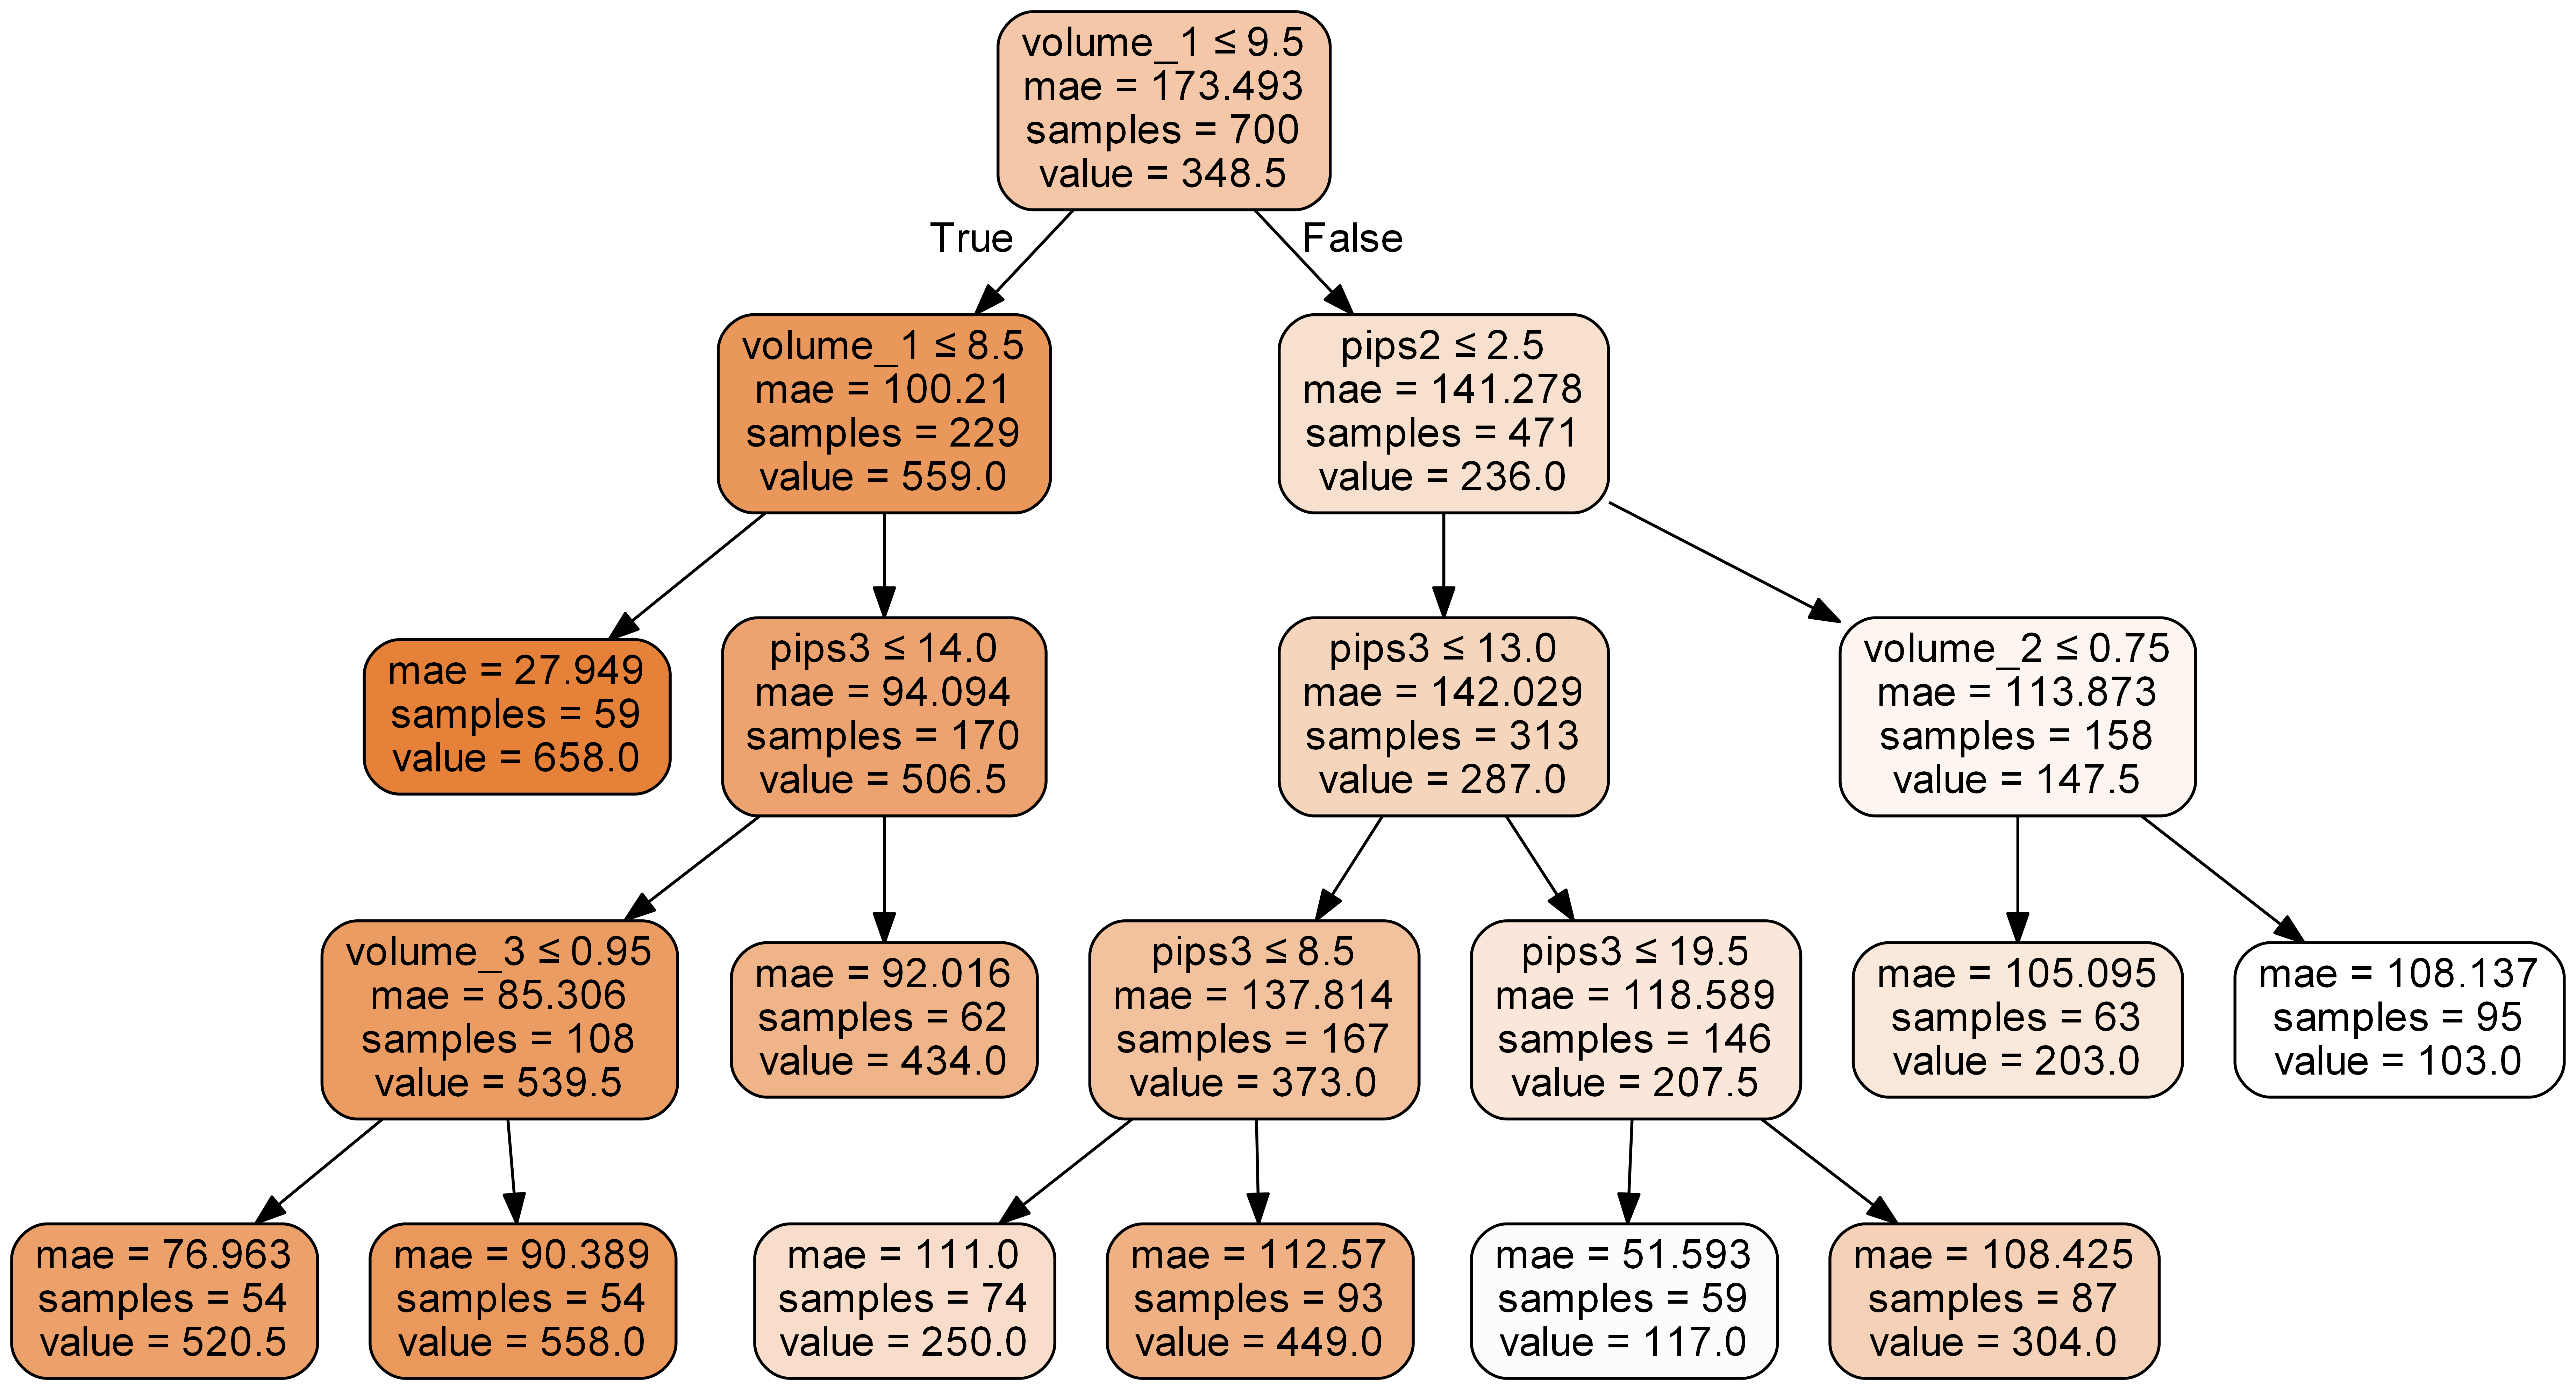

In [16]:
# pip install graphviz
# pip install pydotplus

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file='tree_limited.dot',  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=["volume_1", "volume_2", "volume_3", "pips2","pips3"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Dyrvo.png')

!dot -Tpng tree_limited.dot -o tree_limited03.png -Gdpi=600

#Image(graph.create_png("C:/Users/Marin/Desktop/python/pic/tree_limited03.png"))

Image(filename = 'tree_limited05.png')


In [17]:
# Using those arrays, we can parse the tree structure:

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        #print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        #      "node %s."
        print("%snode=%s test node: go to node %s if %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature_cols[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

# feature importance
print('Feature importance')
feature_impo = pd.DataFrame([clf.feature_importances_])
feature_impo.columns = feature_cols
feature_impo

The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if volume_1 <= 9.5 else to node 8.
	node=1 test node: go to node 2 if volume_1 <= 8.5 else to node 3.
		node=2 leaf node.
		node=3 test node: go to node 4 if pips3 <= 14.0 else to node 7.
			node=4 test node: go to node 5 if volume_3 <= 0.949999988079071 else to node 6.
				node=5 leaf node.
				node=6 leaf node.
			node=7 leaf node.
	node=8 test node: go to node 9 if pips2 <= 2.5 else to node 16.
		node=9 test node: go to node 10 if pips3 <= 13.0 else to node 13.
			node=10 test node: go to node 11 if pips3 <= 8.5 else to node 12.
				node=11 leaf node.
				node=12 leaf node.
			node=13 test node: go to node 14 if pips3 <= 19.5 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
		node=16 test node: go to node 17 if volume_2 <= 0.75 else to node 18.
			node=17 leaf node.
			node=18 leaf node.

Rules used to predict sample 0: 
decision id node 0 : 0, volume_1 (= 10.0) 

,volume_1,volume_2,volume_3,pips2,pips3
0,0.653649,0.019263,0.003088,0.071842,0.252158


In [23]:
df_5000_D1_H4_H1 = pd.read_csv('C:/Users/Marin/Desktop/doktorar/qoutes/nzdusd/testing/AUDUSD/sample5000_detailed_reports.csv')
df_5000_D1_H4_H1.head()

,Unnamed: 0,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,??,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction,timeFrame,risk ratio
0,0,268997,4271.00,63,8.09,67.79,2111.40,2.10,0.0,7,1.0,1.0,18,14,1,0,1440,2.022828
1,1,183285,2184.80,63,5.04,34.68,1454.52,1.45,0.0,5,0.9,0.3,17,10,1,0,1440,1.502076
2,2,109256,1904.76,63,8.05,30.23,1618.74,1.62,0.0,6,0.6,0.3,6,7,1,0,1440,1.176693
3,3,85669,2706.16,63,11.74,42.95,2439.84,2.44,0.0,9,0.7,0.7,3,6,1,0,1440,1.109155
4,4,326453,2254.84,63,13.84,35.79,961.86,0.96,0.0,3,0.6,0.5,13,17,1,0,1440,2.344250


In [31]:
#split dataset in features and target variable
feature_cols = ["volume_1", "volume_2", "volume_3", "pips2","pips3"]
X = df_5000_D1_H4_H1[feature_cols] # Features
y = df_5000_D1_H4_H1['risk ratio'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

# Create Decision Tree classifer object
clf_2 = DecisionTreeRegressor(criterion='mae',max_depth=10,min_samples_split=100,min_samples_leaf=50,presort=True)

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train,training_scores_encoded)

#Predict the response for test dataset
y_pred = clf_2.predict(X_test)



^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.382533 to fit


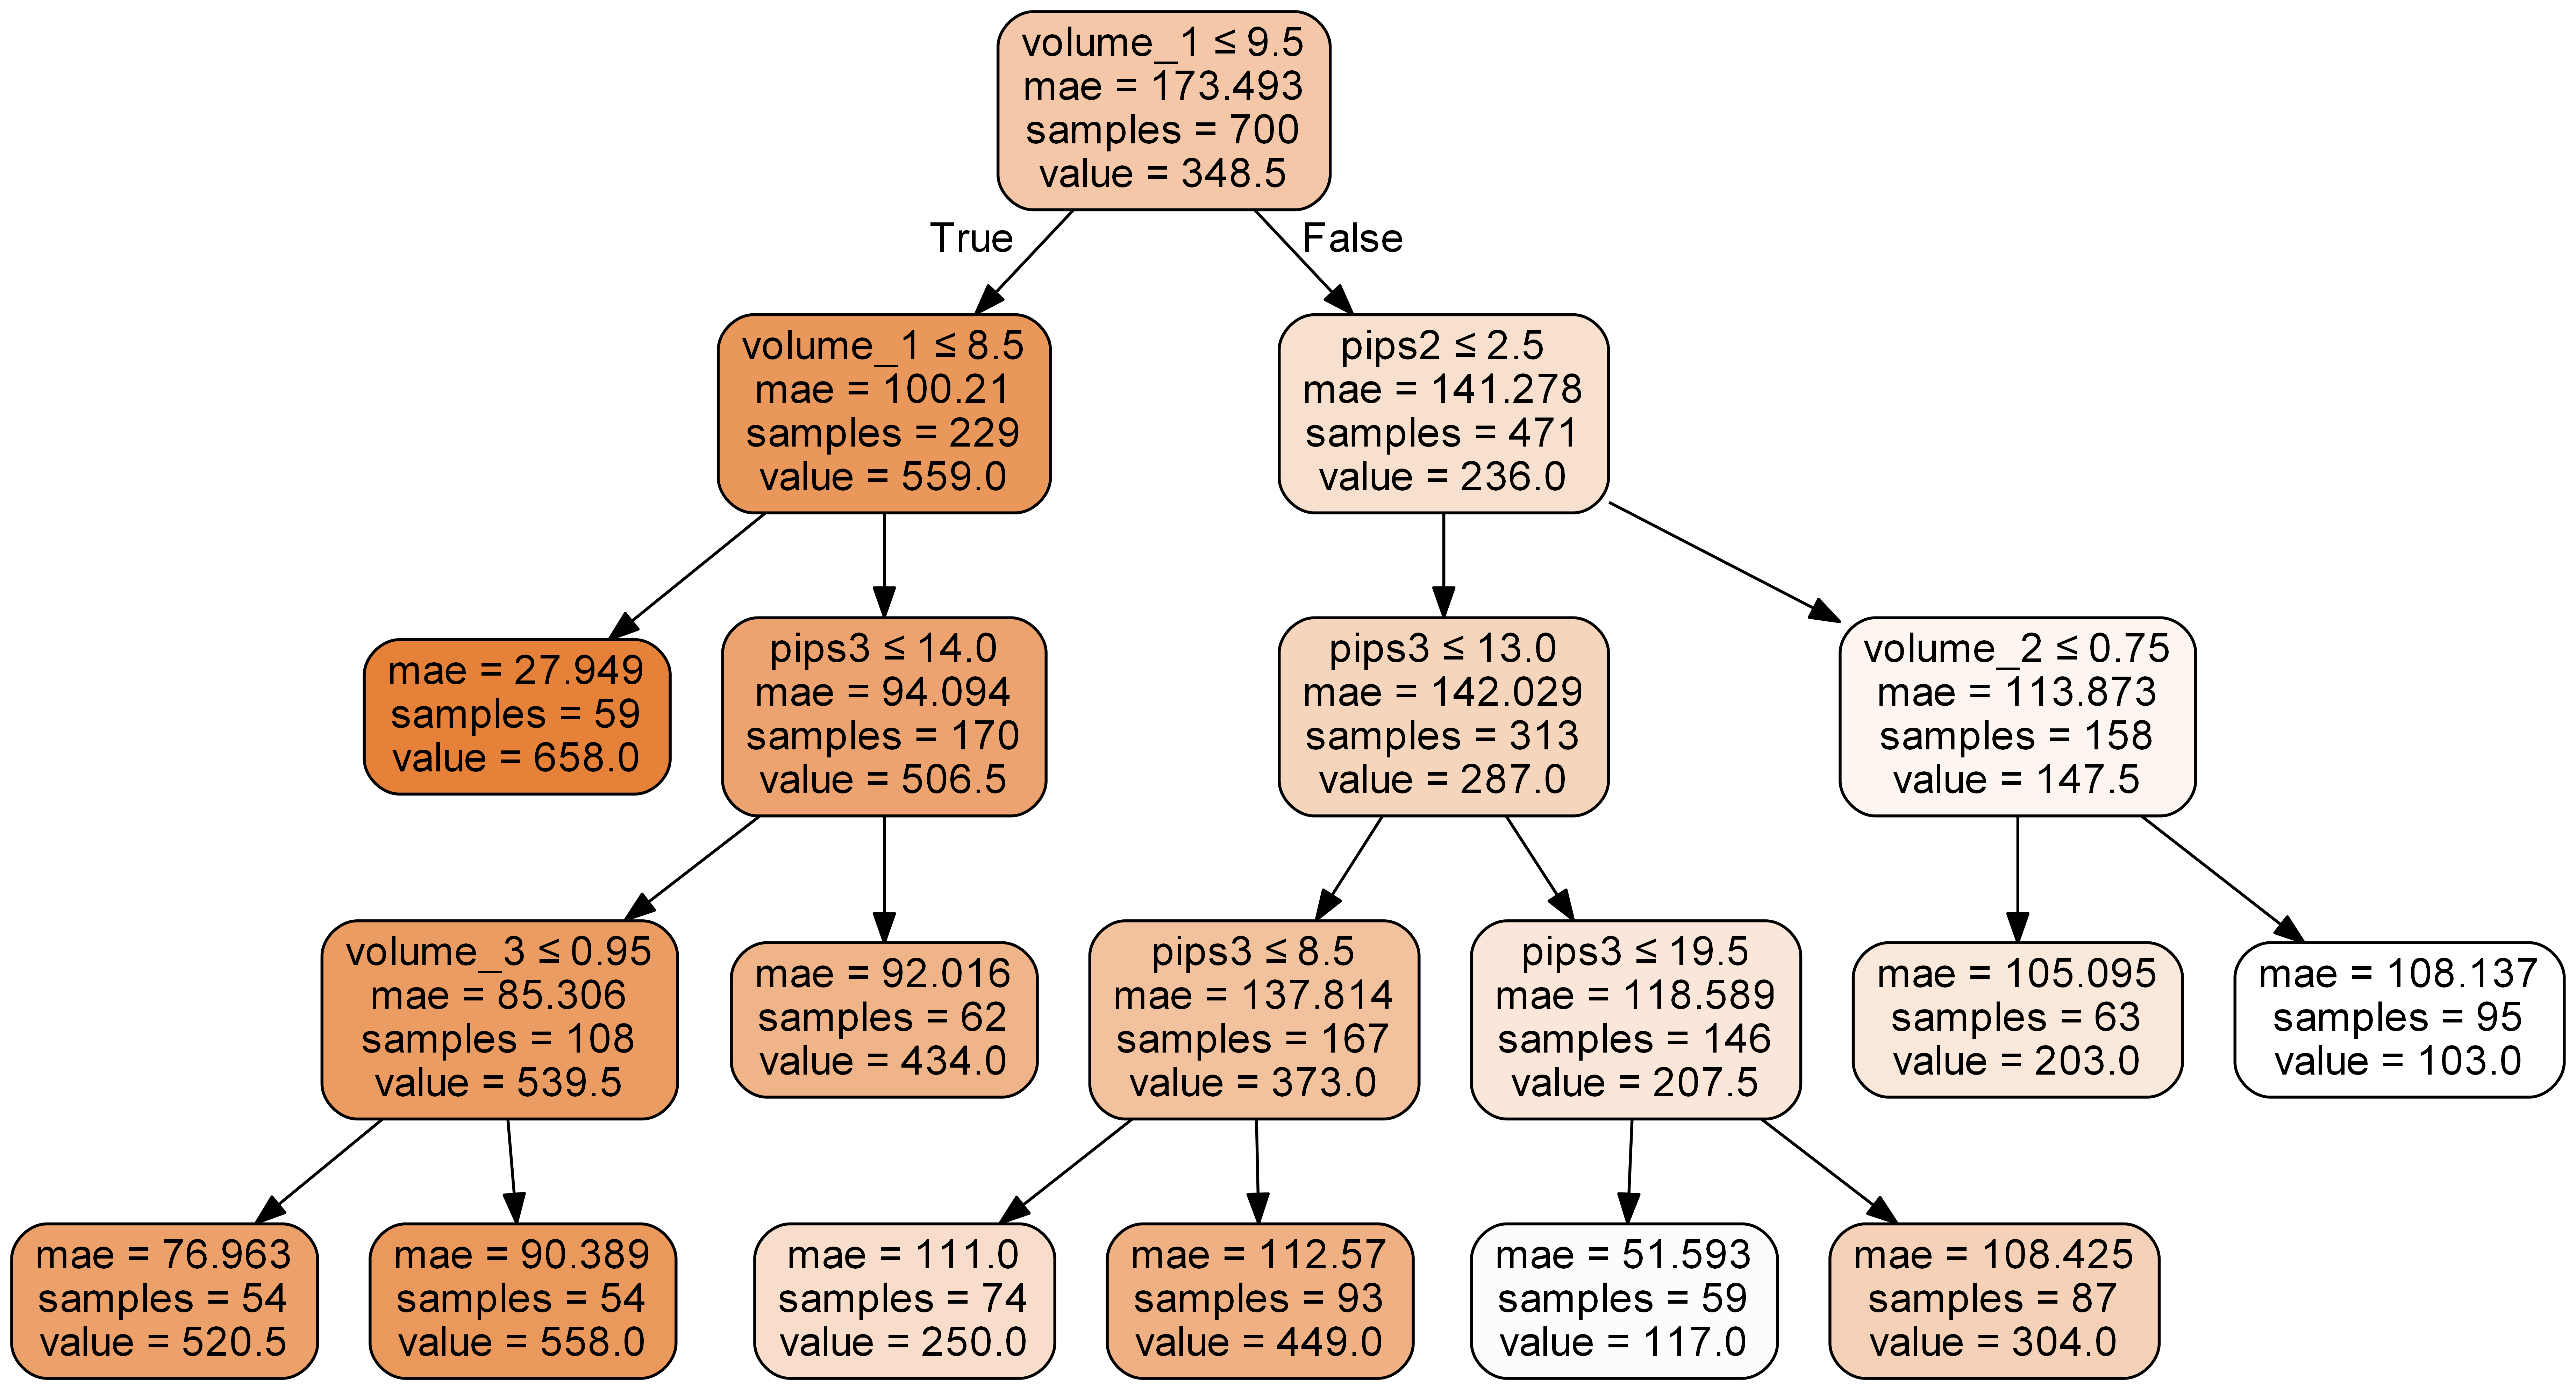

In [32]:
# pip install graphviz
# pip install pydotplus

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file='tree_limited.dot',  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=["volume_1", "volume_2", "volume_3", "pips2","pips3"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Dyrvo.png')

!dot -Tpng tree_limited.dot -o tree_limited03.png -Gdpi=600

#Image(graph.create_png("C:/Users/Marin/Desktop/python/pic/tree_limited03.png"))

Image(filename = 'tree_limited07.png')


In [29]:
# Using those arrays, we can parse the tree structure:

n_nodes = clf_2.tree_.node_count
children_left = clf_2.tree_.children_left
children_right = clf_2.tree_.children_right
feature = clf_2.tree_.feature
threshold = clf_2.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        #print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        #      "node %s."
        print("%snode=%s test node: go to node %s if %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature_cols[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

# feature importance
print('Feature importance')
feature_impo = pd.DataFrame([clf.feature_importances_])
feature_impo.columns = feature_cols
feature_impo

The binary tree structure has 279 nodes and has the following tree structure:
node=0 test node: go to node 1 if volume_1 <= 3.5 else to node 94.
	node=1 test node: go to node 2 if volume_1 <= 1.5 else to node 31.
		node=2 test node: go to node 3 if pips3 <= 3.5 else to node 4.
			node=3 leaf node.
			node=4 test node: go to node 5 if volume_3 <= 0.3500000238418579 else to node 12.
				node=5 test node: go to node 6 if volume_2 <= 0.75 else to node 11.
					node=6 test node: go to node 7 if volume_3 <= 0.15000000596046448 else to node 8.
						node=7 leaf node.
						node=8 test node: go to node 9 if volume_2 <= 0.3500000238418579 else to node 10.
							node=9 leaf node.
							node=10 leaf node.
					node=11 leaf node.
				node=12 test node: go to node 13 if pips2 <= 3.5 else to node 14.
					node=13 leaf node.
					node=14 test node: go to node 15 if volume_2 <= 0.6499999761581421 else to node 26.
						node=15 test node: go to node 16 if volume_3 <= 0.550000011920929 else to node 19

,volume_1,volume_2,volume_3,pips2,pips3
0,0.35365,0.104441,0.137449,0.147551,0.256908
